In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [3]:

%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>


In [4]:
#READING THE DATA
data = pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')

In [5]:
#Glimpse of the data
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [6]:
#Checking for any missing/null values 
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

* There is 1 missing value in the region column. Let's fetch the row and make necessary changes.

In [7]:
bool = pd.isnull(data['region'])
data[bool]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


*Filling in the missing region 

In [8]:
data['region'] = data.region.replace(np.NaN, 'North')

In [9]:
#Checking for null values again.
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

* Now, the data is perfect for analysis.

In [10]:
da = data['state'].value_counts()
da

Gujarat            35
Punjab             32
Maharashtra        30
-1                 24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Nagaland            1
Haryana             1
Uttarakhand         1
Tripura             1
Chhattisgarh        1
NCT of Delhi        1
Name: state, dtype: int64

* But we have an unecessary state name called -1 which we would remove now. 

In [11]:
data.drop(data[data['state']=="-1"].index, inplace = True) 
data.drop(data[data['flavor_profile']=="-1"].index, inplace = True) 

In [12]:
da = data['state'].value_counts()
da

Gujarat            32
Punjab             30
Maharashtra        26
West Bengal        22
Assam              17
Tamil Nadu         16
Andhra Pradesh     10
Uttar Pradesh       9
Rajasthan           6
Odisha              6
Telangana           5
Kerala              5
Karnataka           5
Goa                 3
Bihar               3
Madhya Pradesh      2
Jammu & Kashmir     2
Nagaland            1
Haryana             1
Uttarakhand         1
Tripura             1
Chhattisgarh        1
NCT of Delhi        1
Manipur             1
Name: state, dtype: int64

**Now, the data is perfect.**

In [13]:
#Checking the number of unique dishes.
count = data['name'].value_counts().count()
count

206

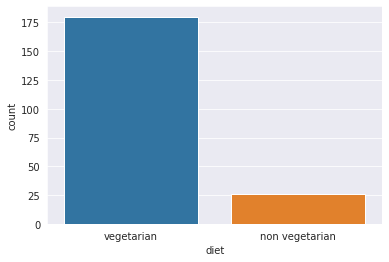

In [14]:
#Now, let's check make a countplot w.r.t Veg/Non veg
sns.countplot(x='diet',data=data)

* More number of vegetarian dishes compared to non veg.

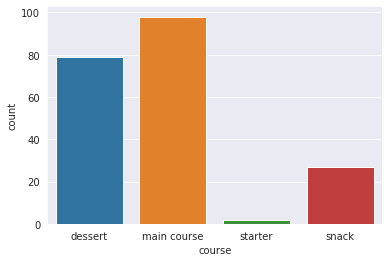

In [15]:
#checking which course has the most number of dishes.
sns.countplot(x='course',data=data)

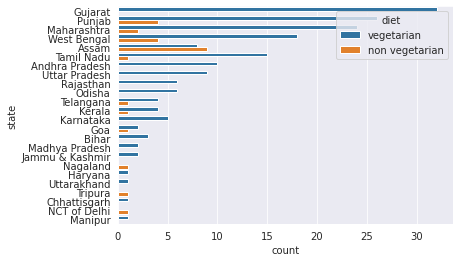

In [16]:
#Checking which state has most number of dishes.
sns.countplot(y='state',hue='diet',data=data,order = data['state'].value_counts().index)

* Gujarat has the most numbre of dishes followed by Punjab and Maharashtra

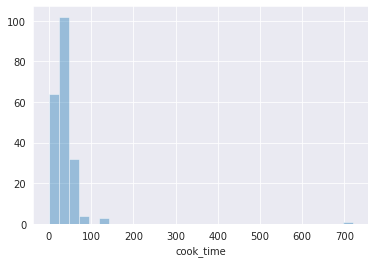

In [17]:
#dist plot on cooking time
sns.distplot(data['cook_time'],bins = 30,kde = False)

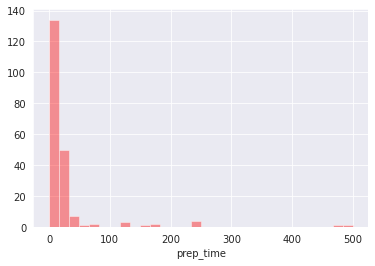

In [18]:
#Dist plot on prep time
sns.distplot(data['prep_time'],bins=30,color='red',kde=False)

In [19]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

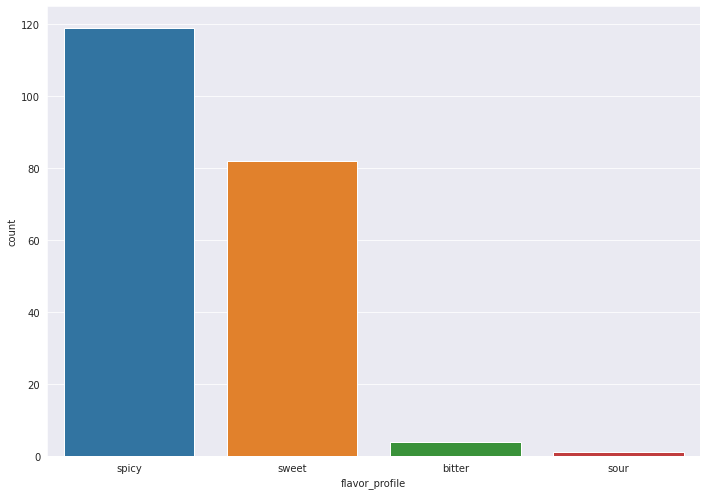

In [20]:
#Analysing the flavor type
sns.countplot(x='flavor_profile',data=data,order = data['flavor_profile'].value_counts().index)

* Most of the dishes are spicy, followed by sweet and bitter

In [21]:
#highest prep time dishes. 
g1 = data.loc[data.prep_time > 1,['name', 'prep_time']].sort_values(by='prep_time',ascending=False)['name'].head(10)
g1

114            Pindi chana
29               Misti doi
123    Tandoori Fish Tikka
66          Chak Hao Kheer
122       Tandoori Chicken
48                Poornalu
33               Ras malai
46          Obbattu holige
124                   Attu
81           Chicken Tikka
Name: name, dtype: object

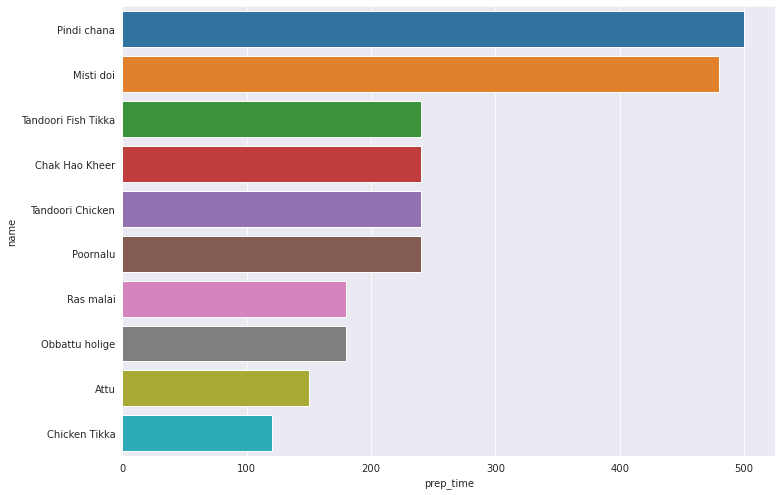

In [22]:
#TOP 10 DISHES WHICH TAKE THE LONGEST PREPARATION TIME
sns.barplot(y=data[data.prep_time > 1].sort_values(by='prep_time',ascending=False)['name'].head(10),x='prep_time',data=data)

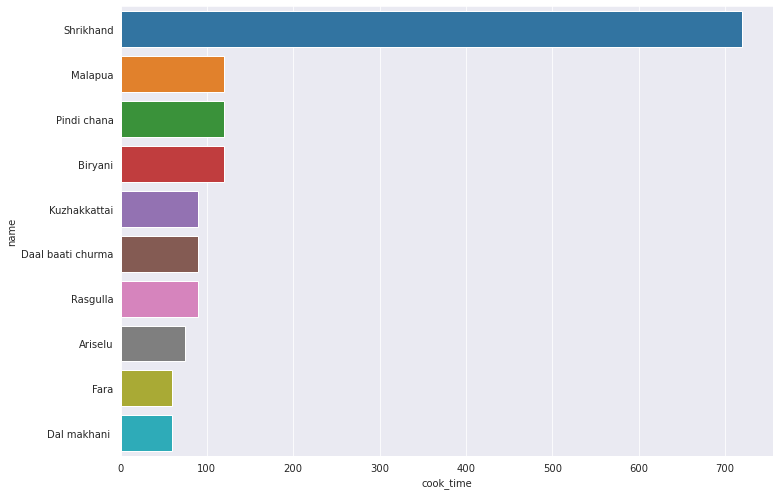

In [23]:
#TOP 10 DISHES WHICH TAKE THE LONGEST COOKING TIME
sns.barplot(y=data[data.prep_time > 1].sort_values(by='cook_time',ascending=False)['name'].head(10),x='cook_time',data=data)

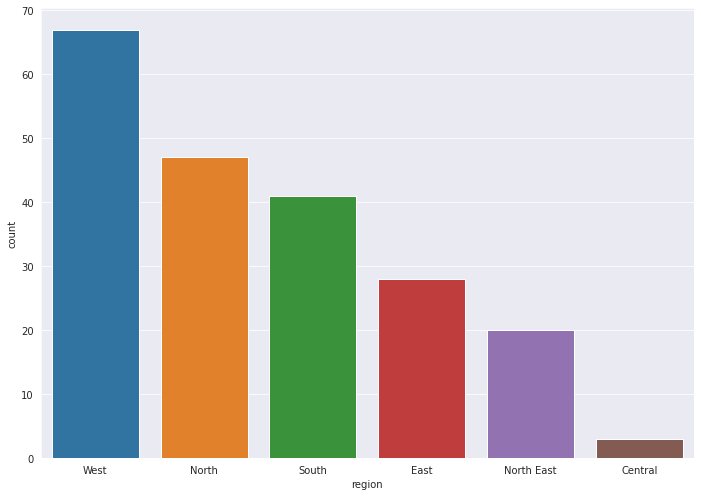

In [24]:
#Count based on region.
sns.countplot(x='region',data=data,order = data['region'].value_counts().index)

# **# FORMING WORCLOUD FOR THE MOST USED INGREDIENT**

In [25]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

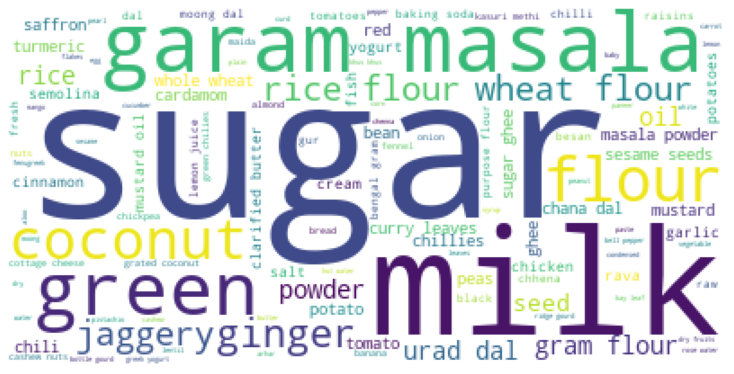

In [26]:
comment_words = '' 
for i in data.ingredients: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
wordcloud_spam = WordCloud(background_color="white").generate(comment_words)
    # Displaying the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud_spam) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

* The most used ingredient seems to be Sugar, followed by milk and garam masala 